# Modelagem e Resolução de Problemas
## Minicurso - Capacitação de Professores PUCRS 2017/1

### Problema 1

Você decidiu abrir uma caderneta de poupança para o seu sobrinho que acaba de nascer, assim quando ele tiver 18 anos encontrará um bom valor para usar como quiser. Você vai fazer depósitos mensais até lá, e deseja descobrir a resposta estas perguntas:

  * Quanto dinheiro estará depositado depois de 48 meses?
  * E depois de 216 meses (ou seja, 18 anos)?
  * Quando ele terá um milhão de reais?
  * O que é mais importante, o valor de abertura da conta ou o depósito

  Encontre as varíaveis importantes e modele a situação.

  Depositando o valor $a$ no primeiro mês e o valor $b$ nos meses
  seguintes.

  Supondo que a taxa de juros é $j$ (o valor atual de $j$ é de aproximadamente
  0.7\%).

\begin{eqnarray*}
\$_1     & = & a \\
\$_{n+1} & = & (1+j)*\$_n+b
\end{eqnarray*}

In [12]:
inicial = 1000
mensal = 100
juros = 0.007 # 0.7%

# Quanto dinheiro estará depositado depois de 48 meses?
final = inicial
for meses in range(48):
    final = final + juros*final + mensal
print("Depois de 48 meses:",final)

# Quanto dinheiro estará depositado depois de 18 anos (216 meses)?
final = inicial
for meses in range(216):
    final = final + juros*final + mensal
print("Depois de 18 anos:",final)

# Quando ele terá um milhão de reais?
final = inicial
meses = 0
while final < 1000000:
    final = final + juros*final + mensal
    meses += 1
print("Ele terá R$ 1 milhão depois de",meses,"meses -",meses//12,"anos")

Depois de 48 meses: 7079.159141115529
Depois de 18 anos: 54682.88046700669
Ele terá R$ 1 milhão depois de 602 meses - 50 anos


### Problema 2

O serviço meteorológico fornece informações sobre a temperatura de cada dia nos últimos 50 anos na sua praia preferida: data, temperatura mínima, temperatura média, temperatura máxima. Você gostaria de obter as seguintes informações importantes para planejar suas férias:

  * Qual o mês com a maior média de temperaturas máximas;
  * Qual o mês com a maior média de temperaturas mínimas;
  * Qual o mês com a maior amplitude térmica;
  
Os registros estão em um arquivo com o seguinte formato:

```ini
#data precip maxima minima horas_insol temp_media um_relativa vel_vento
01/01/1961 -1 33.8 22.2 11.7 27.08 67.0 2.333333
02/01/1961 0.0 34.7 22.5 9.5 28.06 62.5 1.333333
03/01/1961 0.2 27.7 23.1 2.3 24.32 74.25 2.0
04/01/1961 2.4 29.4 20.6 8.7 23.56 57.5 2.333333
```

Cada linha contém as seguintes informações, em ordem: data, precipitação (em mm), temperatura máxima, temperatura mínima, horas de insolação, temperatura média, umidade relativa do ar (%) e velocidade do vento. Caso alguma informação não tenha sido coletada no dia, é utilizado o valor -1.


Mínimas: [ 20.52149533  20.69786354  19.39398873  16.34229275  13.29411392
  10.8962585   10.52715969  11.41252433  13.11643287  15.36202771
  17.09785853  19.12231301]
Máximas: [ 30.54485981  30.26045549  28.71571697  25.68498382  22.33020899
  19.73399048  19.63718954  21.07948052  22.21413262  24.81944444
  27.14935065  29.48541798]
Amplitudes: [ 10.02336449   9.56259194   9.32172824   9.34269107   9.03609507
   8.83773198   9.11002986   9.66695618   9.09769975   9.45741674
  10.05149212  10.36310497]
Mês com menor média de temperatura mínima: 7 ( 10.5271596859 )
Mês com maior média de temperatura máxima: 1 ( 20.6978635424 )
Mês com maior amplitude térmica: 12 ( 10.3631049654 )


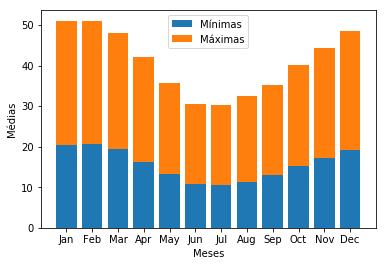

In [16]:
import calendar
import numpy as np
import matplotlib.pyplot as plt

arq = open("poa_temps.txt")
arq.readline() # Pula o cabeçalho

minimas = np.zeros(12)
maximas = np.zeros(12)
totminimas = np.zeros(12)
totmaximas = np.zeros(12)

for linha in arq.readlines():
    dados = linha.split()
    data = dados[0]
    maxima = float(dados[2])
    minima = float(dados[3])

    diamesano = data.split("/")
    mes = int(diamesano[1])-1

    # Há máxima?
    if maxima != -1:
        maximas[mes] += maxima
        totmaximas[mes] += 1

    # Há mínima?
    if minima != -1:
        minimas[mes] += minima
        totminimas[mes] += 1

arq.close()

mins = minimas/totminimas
print("Mínimas:",mins)

maxs = maximas/totmaximas
print("Máximas:",maxs)

ampli = maxs - mins
print("Amplitudes:",ampli)

mesMenor = mins.argmin()
mesMenorValor = mins.min()
mesMaior = maxs.argmax()
mesMaiorValor = mins.max()

ampliMaior = ampli.argmax()
ampliMaiorValor = ampli.max()

print("Mês com menor média de temperatura mínima:",mesMenor+1,"(",mesMenorValor,")")
print("Mês com maior média de temperatura máxima:",mesMaior+1,"(",mesMaiorValor,")")
print("Mês com maior amplitude térmica:",ampliMaior+1,"(",ampliMaiorValor,")")

meses = np.linspace(1,12,12) # 1, 2, 3..., 12
plt.xlabel("Meses")
plt.ylabel("Médias")
plt.xticks(range(1,13), calendar.month_abbr[1:13])
plt.bar(meses,mins,label="Mínimas")
plt.bar(meses,maxs,bottom=mins,label="Máximas")
plt.legend()
plt.show()

### Problema 3

Infelizmente um vírus acaba de sofrer uma mutação e passou das gaivotas
para os humanos, contaminando as pessoas. No início você tem uma pessoa
contaminada (o *paciente zero*), que poderá contaminar outras
pessoas ao encontrá-las. Determine as informações que você precisa
para construir um modelo de propagação da doença e qual seria este
modelo. Investigue os limites da validade do seu modelo.

Informação: taxa de contágio $\alpha$ entre contaminados e não-contaminados.
(Sug. $\alpha=0.002$)

Informação: taxa de mortalidade $\beta$ de contaminados. (Sug. $\beta=0.06$)
\begin{eqnarray*}
Pop & = & 1000000 \\
C_1 & = & 1 \\
S_1 & = & Pop - C_1 \\
M_\infty & = & 0 \\
I_\infty & = & 0
\end{eqnarray*}

Primeiro calculamos quantas novas pessoas terão adoecido no momento $n$:

$$ A_n = \frac{\alpha S_nC_n}{Pop} $$

E atualizamos os números de pessoas sadias e contaminadas

\begin{eqnarray*}
S_{n+1}     & = & S_n - A_n \\
C_{n+1}     & = & C_n + A_n
\end{eqnarray*}

Algumas destes novos doentes vão morrer, outros vão ficar imunizados:

\begin{eqnarray*}
M_\infty & = & M_\infty + \beta*A_n \\
I_\infty & = & I_\infty + (1-\beta)*A_n
\end{eqnarray*}

0  - Sadias: 99979 Mortas: 0 Imunizadas: 0 Total: 100000
100  - Sadias: 99856 Mortas: 6 Imunizadas: 116 Total: 100000
200  - Sadias: 99056 Mortas: 46 Imunizadas: 876 Total: 100001
300  - Sadias: 94099 Mortas: 293 Imunizadas: 5585 Total: 100001
400  - Sadias: 70717 Mortas: 1463 Imunizadas: 27798 Total: 100000
500  - Sadias: 26523 Mortas: 3672 Imunizadas: 69782 Total: 100000
600  - Sadias: 5058 Mortas: 4746 Imunizadas: 90174 Total: 100000
700  - Sadias: 776 Mortas: 4960 Imunizadas: 94241 Total: 100000


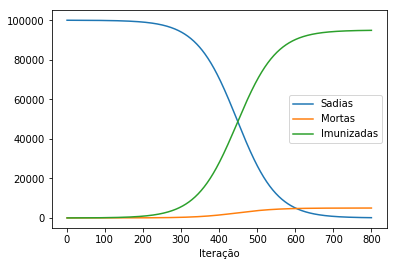

In [9]:
import math
repet = 800
Pop = 100000
iniciais = 21
sadias = Pop - iniciais
mortas = 0
imunizadas = 0
contaminadas = iniciais

contagio = 0.02
mortalidade = 0.05

listaSadias = np.zeros(repet)
listaMortas = np.zeros(repet)
listaImuniz = np.zeros(repet)

for it in range(repet):

    if it % 100 == 0:
        print(it," - Sadias:",int(sadias),"Mortas:",int(mortas),"Imunizadas:",int(imunizadas),"Total:",math.ceil(iniciais+sadias+mortas+imunizadas))
    
    adoecem = contagio * sadias * contaminadas / Pop
    contaminadas = contaminadas + (1 - mortalidade) * adoecem
    mortas = mortas + mortalidade * adoecem
    imunizadas = imunizadas + (1 - mortalidade) * adoecem
    sadias = sadias - adoecem
    
    listaSadias[it] = sadias
    listaMortas[it] = mortas
    listaImuniz[it] = imunizadas
    
its = np.linspace(1,repet,repet) # 1, 2, 3..., repet
plt.xlabel("Iteração")
plt.plot(its,listaSadias,label="Sadias")
plt.plot(its,listaMortas,label="Mortas")
plt.plot(its,listaImuniz,label="Imunizadas")
plt.legend()
plt.show()

### Problema 4

Para terminar sua dissertação sobre linguística, seu primo precisa
analisar as obras completas de Shakespeare e determinar quais são
as 20 palavras que aparecem mais vezes. Proponha um processo que possa
começar com os textos completos e chegar à resposta final. Lembre
que são quase 900 mil palavras...

In [18]:
import string, re

arq = open("shakespeare2.txt")
dic = {}

for line in arq.readlines():
    line = line.strip()
    if line:
        for word in line.split(' '):
            if len(word) == 0:
                continue
            if word in dic:
                dic[word] = dic[word] + 1
            else:
                dic[word] = 1

arq.close()

s = [(k, dic[k]) for k in sorted(dic, key=dic.get, reverse=True)]

print("Palavras distintas:",len(s))
for k,v in s[:20]:
    print(k,'->',v)

Palavras distintas: 27942
the -> 27361
and -> 26028
i -> 20681
to -> 19150
of -> 17463
a -> 14593
you -> 13615
my -> 12481
in -> 10956
that -> 10890
is -> 9134
not -> 8497
with -> 7771
me -> 7769
it -> 7678
for -> 7558
his -> 6857
be -> 6857
your -> 6655
this -> 6602
